In [29]:
from fastbook import *
from fastai.vision.all import *

In [30]:
#urls = search_images_ddg('bird photos',max_images=1)
#len(urls),urls[0]

In [31]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)


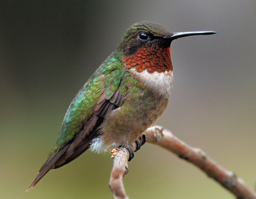

In [32]:
im = Image.open(dest)
im.to_thumb(256,256)

In [33]:
searches = ['forest','bird']
path = Path("D:/works/bird detection/bird")
for o in searches:
    dest = path/o
    if not dest.exists():
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])


In [34]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)


(#13) [None,None,None,None,None,None,None,None,None,None...]

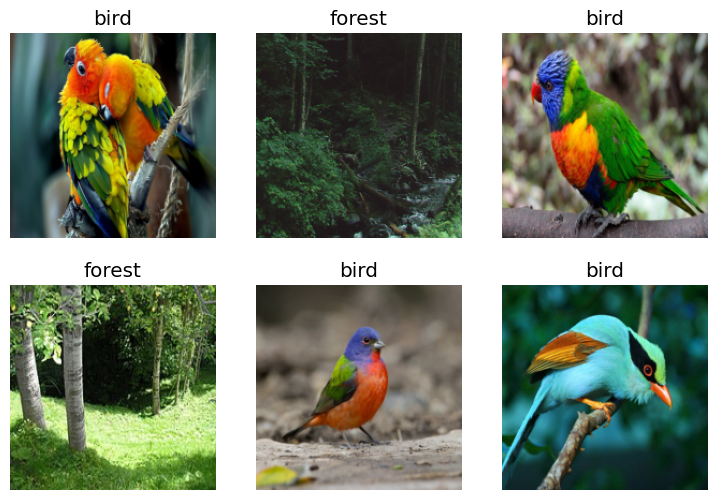

In [35]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]

).dataloaders(path)


dls.show_batch(max_n=6)

In [36]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\jeeva\AppData\Roaming\Python\Python312\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\jeeva/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:08<00:00, 5.57MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.939514,0.477117,0.154930,01:52


epoch,train_loss,valid_loss,error_rate,time
0,0.031652,0.087709,0.042254,02:04
1,0.019139,0.001112,0.000000,02:00
2,0.012478,0.000073,0.000000,02:00


In [37]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability its a bird: {probs[0]:.4f}")

This is a: bird.
Probability its a bird: 1.0000
